In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [4]:
import os
os.chdir('C:/Users/z001133/OneDrive - Alliance/Desktop')
ds = pd.read_excel('nisa.xlsx')
ds['SPOT_year'] = pd.to_datetime(ds['SPOT_year'],infer_datetime_format=True)
indexeddata = ds.set_index(['SPOT_year'])

In [5]:
from datetime import datetime
indexeddata.tail()

,ratio
SPOT_year,
2018-08-01,0.527916
2018-09-01,0.433333
2018-10-01,0.459048
2018-11-01,0.701678
2018-12-01,0.634387


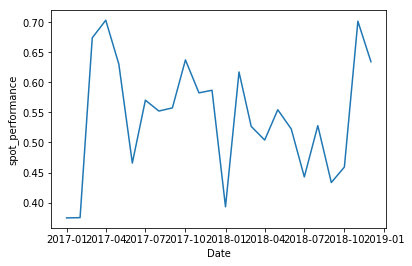

In [6]:
plt.xlabel("Date")
plt.ylabel("spot_performance")
plt.plot(indexeddata)

In [61]:
rolmean = indexeddata.rolling(window=3).mean()
rolstd = indexeddata.rolling(window=3).std()
print(rolmean,rolstd)

               ratio
SPOT_year           
2017-01-01       NaN
2017-02-01       NaN
2017-03-01  0.474481
2017-04-01  0.584120
2017-05-01  0.669294
2017-06-01  0.599828
2017-07-01  0.555497
2017-08-01  0.529452
2017-09-01  0.560047
2017-10-01  0.582384
2017-11-01  0.592466
2017-12-01  0.602251
2018-01-01  0.520763
2018-02-01  0.532349
2018-03-01  0.512324
2018-04-01  0.549354
2018-05-01  0.528413
2018-06-01  0.526957
2018-07-01  0.506515
2018-08-01  0.497666
2018-09-01  0.467975
2018-10-01  0.473432
2018-11-01  0.531353
2018-12-01  0.598371                ratio
SPOT_year           
2017-01-01       NaN
2017-02-01       NaN
2017-03-01  0.172886
2017-04-01  0.181783
2017-05-01  0.036707
2017-06-01  0.121737
2017-07-01  0.083351
2017-08-01  0.055934
2017-09-01  0.009307
2017-10-01  0.047695
2017-11-01  0.040856
2017-12-01  0.030495
2018-01-01  0.110745
2018-02-01  0.121713
2018-03-01  0.112883
2018-04-01  0.059922
2018-05-01  0.025271
2018-06-01  0.025537
2018-07-01  0.057563
2018-08-01  0

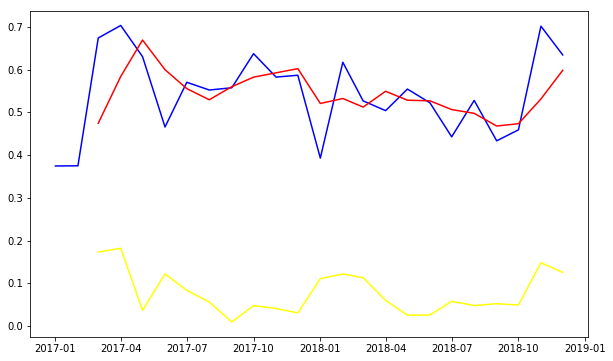

In [62]:
orig = plt.plot(indexeddata,color='blue',label='Original')
rolmean = plt.plot(rolmean,color='red',label='Mean')
rolstd = plt.plot(rolstd,color='yellow',label='Std')
#plt.legend(loc='best')
#plt.title('rolling mean and std')
#plt.show(block=False)
#when rolling mean and std is not constant , then the series is not stationary
#time series is advised to be performed on stationary data 

In [63]:
from statsmodels.tsa.stattools import adfuller

print('results of dickey fuller test')

dftest = adfuller(indexeddata['ratio'],autolag='AIC')

dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of observations used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

#null hypothesis is "data is not stationary"

# null hyptohesis can be rejected (accept that data is stationary) if below two rules are satisfied
# p-value < 0.05
# critical values > test statistics

# if not accept the null hypothesis (data is not stationary)


results of dickey fuller test
Test Statistic                 -4.050336
p-value                         0.001169
#Lags Used                      0.000000
Number of observations used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


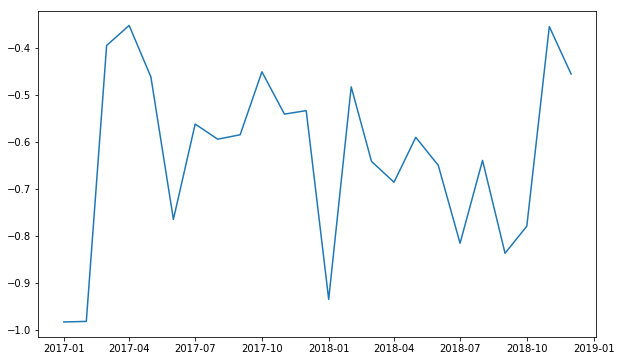

In [20]:
logdata = np.log(indexeddata)
plt.plot(logdata)

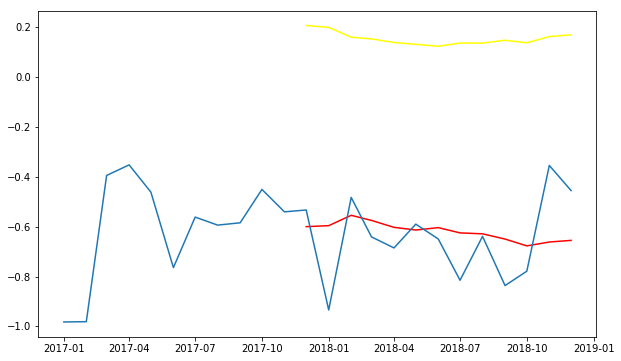

In [24]:
rollogmean = logdata.rolling(window=12).mean()
rollogstd = logdata.rolling(window=12).std()
plt.plot(rollogmean,color='red',label='Mean')
plt.plot(rollogstd,color='yellow',label='Std')
plt.plot(logdata)

In [26]:
transdata = logdata - rollogmean
transdata.dropna(inplace=True)

In [58]:
from statsmodels.tsa.stattools import adfuller

def test_stationary(series):
    avg = series.rolling(window=6).mean()
    std = series.rolling(window=6).std()
    
    orig = plt.plot(series,color='blue',label='original')
    mean = plt.plot(avg,color='red',label='mean')
    var = plt.plot(std,color='yellow',label='variance')
    
    dftst = adfuller(series['ratio'],autolag='AIC')
    dfoutput = pd.Series(dftst[0:4],index=['Test Statistics','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftst[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

Test Statistics                -4.050336
p-value                         0.001169
#Lags Used                      0.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


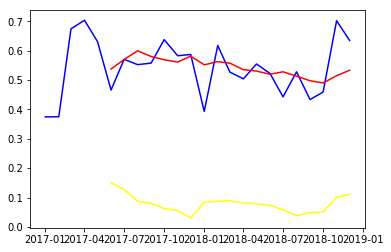

In [59]:
test_stationary(indexeddata)

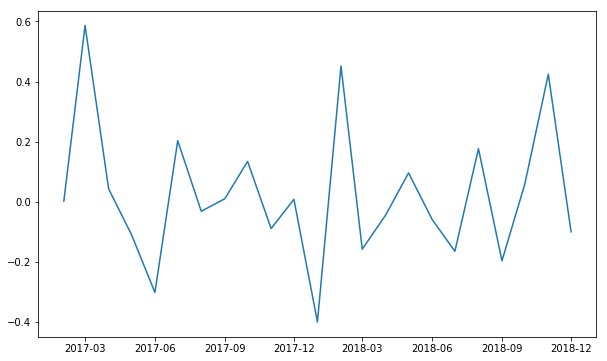

In [33]:
lognewdata = logdata - logdata.shift()
plt.plot(lognewdata)

Test Statistics               -6.206949e+00
p-value                        5.627631e-08
#Lags Used                     0.000000e+00
Number of Observations Used    2.200000e+01
Critical Value (1%)           -3.769733e+00
Critical Value (5%)           -3.005426e+00
Critical Value (10%)          -2.642501e+00
dtype: float64


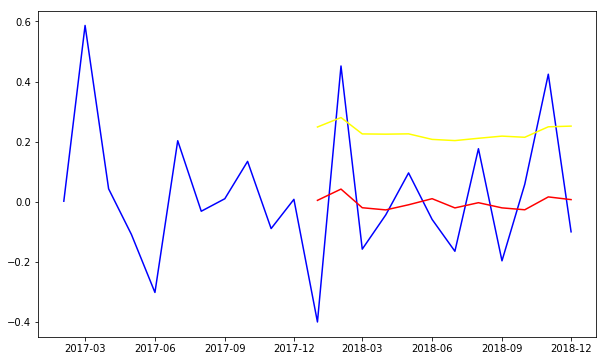

In [43]:
lognewdata.dropna(inplace=True)
test_stationary(lognewdata)

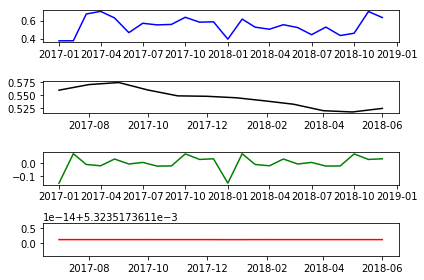

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexeddata)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexeddata,color='blue',label='origin')


plt.subplot(412)
plt.plot(trend,color='black',label='trend')


plt.subplot(413)
plt.plot(seasonal,color='green',label='seasonal')

plt.subplot(414)
plt.plot(residual,color='red',label='residual')

plt.tight_layout()


decomposeddata = residual
decomposeddata.dropna(inplace=True)

Test Statistics                1.687906e-16
p-value                        9.585321e-01
#Lags Used                     0.000000e+00
Number of Observations Used    1.100000e+01
Critical Value (1%)           -4.223238e+00
Critical Value (5%)           -3.189369e+00
Critical Value (10%)          -2.729839e+00
dtype: float64


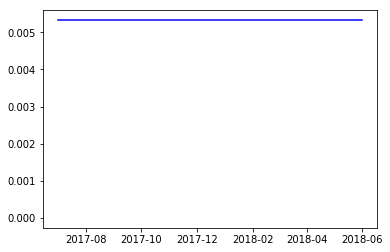

In [11]:
test_stationary(decomposeddata)

Text(0.5,1,'partial auto correlation')

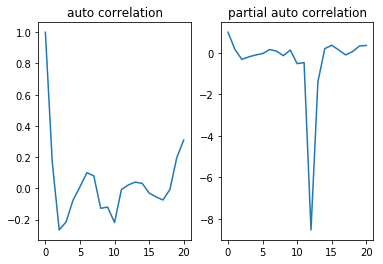

In [12]:
from statsmodels.tsa.stattools import acf,pacf

acf = acf(indexeddata , nlags = 20)
pacf = pacf(indexeddata , nlags = 20 , method = 'ols')


plt.subplot(121)
plt.plot(acf)
plt.title('auto correlation')

plt.subplot(122)
plt.plot(pacf)
plt.title('partial auto correlation')



C:\Users\z001133\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5,1,'MAPE: 0.234774')

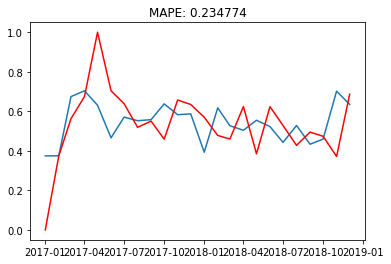

In [83]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(indexeddata,order=(1,1,0),seasonal_order=(1, 1, 0, 2))
results = model.fit(disp=-1)
plt.plot(indexeddata)
plt.plot(results.fittedvalues,color='red')
#plt.title('RSS: %f'% sum((results.fittedvalues-indexeddata['ratio'])**2))
plt.title('MAPE: %f'% (abs(indexeddata['ratio']-results.fittedvalues)/indexeddata['ratio']).mean())

C:\Users\z001133\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


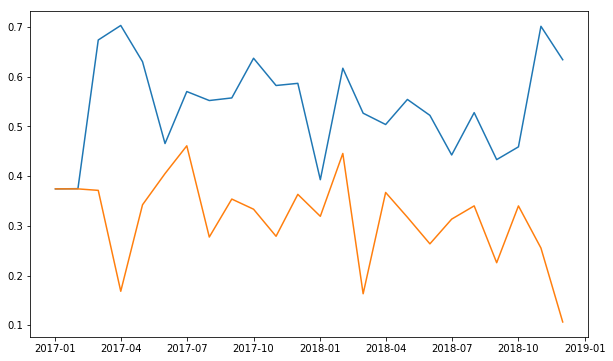

In [139]:
pred = pd.Series(results.fittedvalues,copy=True)
pred_cumsum = pred.cumsum()
pred_arima = pd.Series(indexeddata['ratio'].ix[0],index=indexeddata.index)
pred_arima = pred_arima.add(pred_cumsum,fill_value=0)

#preds = np.exp()
plt.plot(indexeddata)
plt.plot(pred_arima)

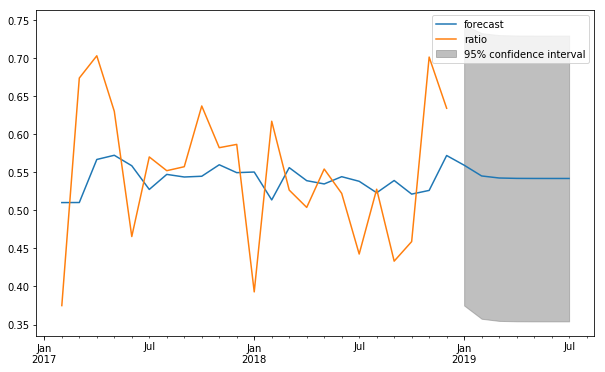

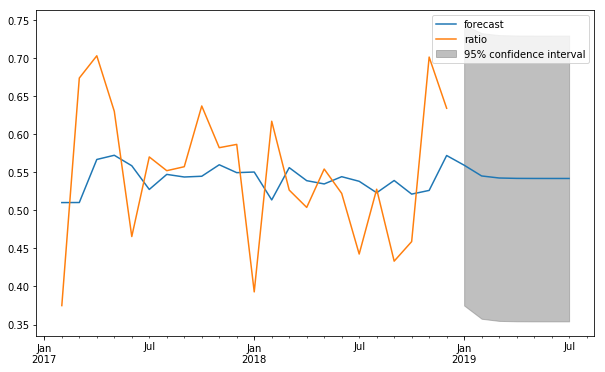

In [127]:
results.plot_predict(1,30)

In [121]:
results.forecast(steps=3)

(array([0.67000807, 0.67531547, 0.68955203]),
 array([0.11367129, 0.1391091 , 0.16571222]),
 array([[0.44721643, 0.89279971],
        [0.40266664, 0.9479643 ],
        [0.36476205, 1.01434202]]))